# What makes a video game successful?

### Problem Statement:
Prediction of the success rate of a video game based on the given features of the dataset.


Our group wants to explore the factors to determine the success factor of a video game. For a game to be successful, we defined it to be a game that has either global or regional sales that are higher than the median number of sales in the respective category. As such, we aim to build an accurate prediction model that could potentially predict the success of a game based on the given features in our dataset.

### Machine Learning Algorithms Used
- **RandomForest Classifier**
- **Logistic Regression**
- **Ridge Classification**
- **Stochastic Gradient Descent**

### Variables Description
| Variables       | Description                                                   |
|:----------------|:--------------------------------------------------------------|
| Name            | Name of the video game                                        |
| Platform        | Game's Platform                                               |
| Year_of_Release | Year of Release                                               |
| Genre           | Game Genre                                                    |
| Publisher       | Name of Publisher                                             |
| NA_Sales        | North American Sales of the video game                        |
| EU_Sales        | European Sales of the video game                              |
| JP_Sales        | Japanese Sales of the video game                              |
| Other_Sales     | Remaining Region Sales of the video game                      |
| Global_Sales    | Global Sales of the video game                                |
| Critic_score    | Aggregate score compiled by Metacritic staff                  |
| Critic_count    | The number of critics used in coming up with the Critic_score |
| User_score      | Score by Metacritic's subscribers                             |
| User_count      | Number of users who gave the user_score                       |
| Developer       | Party responsible for creating the game                       |
| Rating          | The ESRB ratings                                             

### Topic covered in this notebook
1. Data Preparation and cleaning
2. Exploratory Data Analysis
3. ML Models Analysis
4. Model Evaluation

### Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.patches as mpatches
sb.set() # set the default Seaborn style for graphics

# set seed for reproducibility
np.random.seed(0)

# for Box-Cox Transformation
from scipy import stats

In [2]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imblearn

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
vdgamedata = pd.read_csv("videogames_data.csv")
vdgamedata.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("Data type : ", type(vdgamedata))
print("Data dims : ", vdgamedata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (16719, 16)


As shown above, our data set provides many columns, 16, that we could use as potential predictors when predicting the success factor of a game, with 16719 rows of data.

### Data Preparation and Cleaning

For this data preparation and cleaning, we will be checking whether our dataset has missing values and has outliers for numeric variables.

In [7]:
vdgamedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


However, from this we can see that there are many missing values for most of the columns of data.

As such, we created a function to calculate and represent the data more clearly.

In [8]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : "Missing Values", 1 : "% of Total Values"})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    "% of Total Values", ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [9]:
missing_values_table(vdgamedata)

Your selected dataframe has 16 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
User_Count,9129,54.6
Critic_Score,8582,51.3
Critic_Count,8582,51.3
Rating,6769,40.5
User_Score,6704,40.1
Developer,6623,39.6
Year_of_Release,269,1.6
Publisher,54,0.3
Name,2,0.0
Genre,2,0.0


From the results, most of the data have around 40% or over 50% missing values. Thus, the data may not be representative of the whole dataset.

To explore a little more, we removed the rows of games that had 3 or more missing values, which indicated that there was too little information on the game to be of any use in our prediction models.

In [10]:
# check the number of missing values in each column
vdgamedata.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [11]:
# removing all the rows that have 3 or more missing values
vdgamedata = vdgamedata.loc[vdgamedata.isnull().sum(axis=1)<3]

# looking random 10 rows of the data
vdgamedata.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9141,Metal Slug Anthology,Wii,2006.0,Shooter,Ignition Entertainment,0.12,0.01,0.00,0.01,0.14,73.0,38.0,8,22.0,Terminal Reality,T
15001,GRID Autosport,PC,2014.0,Racing,Codemasters,0.00,0.02,0.00,0.00,0.02,78.0,35.0,6.2,257.0,Codemasters,E
5167,Castlevania: Order of Ecclesia,DS,2008.0,Platform,Konami Digital Entertainment,0.27,0.02,0.04,0.03,0.36,85.0,46.0,8.7,111.0,Konami,T
7494,X2: Wolverine's Revenge,XB,2003.0,Platform,Activision,0.15,0.04,0.00,0.01,0.21,58.0,27.0,6.4,9.0,GenePool,T
2777,MLB 13: The Show,PS3,2013.0,Sports,Sony Computer Entertainment,0.67,0.00,0.00,0.07,0.74,87.0,36.0,7.8,114.0,SCEA San Diego Studios,E
3392,NHL 11,PS3,2010.0,Sports,Electronic Arts,0.40,0.12,0.00,0.07,0.59,88.0,38.0,7.1,54.0,Electronic Arts,E10+
9817,The Smurfs 2,X360,2013.0,Platform,Ubisoft,0.03,0.08,0.00,0.01,0.12,NaN,NaN,5.4,14.0,WayForward,E
5535,NBA Live 06,GC,2005.0,Sports,Electronic Arts,0.25,0.07,0.00,0.01,0.33,76.0,14.0,tbd,NaN,EA Canada,E
7212,Child of Eden,PS3,2011.0,Shooter,Ubisoft,0.09,0.10,0.00,0.04,0.22,81.0,21.0,7.8,25.0,Q Entertainment,E10+
2728,Shark Tale,PS2,2004.0,Action,Activision,0.37,0.29,0.00,0.10,0.75,69.0,30.0,6.5,6.0,Edge of Reality,E


In [12]:
vdgamedata.isnull().sum()

Name                  0
Platform              0
Year_of_Release     149
Genre                 0
Publisher             4
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score        553
Critic_Count        553
User_Score           24
User_Count         1104
Developer             4
Rating               72
dtype: int64

In [13]:
vdgamedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8674 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8674 non-null   object 
 1   Platform         8674 non-null   object 
 2   Year_of_Release  8525 non-null   float64
 3   Genre            8674 non-null   object 
 4   Publisher        8670 non-null   object 
 5   NA_Sales         8674 non-null   float64
 6   EU_Sales         8674 non-null   float64
 7   JP_Sales         8674 non-null   float64
 8   Other_Sales      8674 non-null   float64
 9   Global_Sales     8674 non-null   float64
 10  Critic_Score     8121 non-null   float64
 11  Critic_Count     8121 non-null   float64
 12  User_Score       8650 non-null   object 
 13  User_Count       7570 non-null   float64
 14  Developer        8670 non-null   object 
 15  Rating           8602 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.1+ MB


In [14]:
missing_values_table(vdgamedata)

Your selected dataframe has 16 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
User_Count,1104,12.7
Critic_Score,553,6.4
Critic_Count,553,6.4
Year_of_Release,149,1.7
Rating,72,0.8
User_Score,24,0.3
Publisher,4,0.0
Developer,4,0.0


After dropping the rows, we are left with 8674 entries. Looking at the missing values again, the % of missing values have dropped drastically.

We decided to drop the missing year of release and rating rows as they make up a small 1.7% and 0.8% of the total values, as a way to preserve the sample size of our dataset.

In [15]:
vdgamedata[vdgamedata['Year_of_Release'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
627,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.33,0.00,0.21,2.47,92.0,72.0,8.2,178.0,Harmonix Music Systems,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16280,Homeworld Remastered Collection,PC,NaN,Strategy,NaN,0.00,0.01,0.00,0.00,0.01,86.0,49.0,8.2,324.0,Gearbox Software,E10+
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,tbd,NaN,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M


In [16]:
## drop the missing values of Year_of_Release
vdgamedata.dropna(subset=["Year_of_Release"], inplace=True)

In [17]:
vdgamedata[vdgamedata['Publisher'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8494,Stronghold 3,PC,2011.0,Strategy,NaN,0.06,0.1,0.0,0.0,0.16,47.0,29.0,3,350.0,FireFly Studios,T


In [18]:
## since we only left with one missing value for publisher, we manually fill the missing data of publisher
vdgamedata['Publisher'].fillna('7Sixty LLC', inplace=True)
vdgamedata[vdgamedata['Publisher'] == '7Sixty LLC']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8494,Stronghold 3,PC,2011.0,Strategy,7Sixty LLC,0.06,0.1,0.0,0.0,0.16,47.0,29.0,3,350.0,FireFly Studios,T


In [19]:
vdgamedata[vdgamedata['Developer'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5929,AMF Bowling 2004,XB,2003.0,Sports,Mud Duck Productions,0.22,0.06,0.0,0.01,0.30,48.0,6.0,4.4,8.0,NaN,NaN
8778,Blitz: The League II,PS3,2008.0,Sports,Midway Games,0.11,0.02,0.0,0.02,0.15,62.0,25.0,7.5,15.0,NaN,NaN
10697,Harry Potter and the Deathly Hallows - Part 2,PC,2011.0,Action,Electronic Arts,0.05,0.04,0.0,0.01,0.10,43.0,12.0,5,56.0,NaN,NaN
14654,The Wolf Among Us,X360,2011.0,Adventure,Telltale Games,0.01,0.02,0.0,0.00,0.03,83.0,5.0,7.7,88.0,NaN,NaN


In [20]:
## manually fill the missing value since there are only 4 missing values
vdgamedata.loc[5929, 'Developer'] = 'Mud Duck Productions'
vdgamedata.loc[8778, 'Developer'] = 'Midway Games'
vdgamedata.loc[10697, 'Developer'] = 'EA Bright Light'
vdgamedata.loc[14654, 'Developer'] = 'Telltale Games'

vdgamedata.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score        553
Critic_Count        553
User_Score           24
User_Count         1078
Developer             0
Rating               70
dtype: int64

Since the Developer and Publisher columns only have 4 and 1 missing value respectively, we decided to manually fill the values to avoid dropping the rows.

Also, since the Critic_Score and User_Score may be useful as a predictor in our prediction model, we have decided to use mean imputation on the remaining missing values for these columns.

This method preserves the mean and standard deviation of the data, which is important to maintain accuracy in the statistical analysis. It is still effective when using modelling techniques that we would be using, due to the small amounts of missing data with respect to the total values (6.4% of Critic_Score and 0.3% of User_Score).

In [21]:
from sklearn.impute import SimpleImputer

def mean_imputer(col):
    # Create an imputer object with the mean strategy
    imputer = SimpleImputer(strategy='mean')

    # Select the column to impute
    column_to_impute = col

    # Fit the imputer on the column with missing values
    imputer.fit(vdgamedata[[column_to_impute]])

    # Transform the column with missing values
    vdgamedata[column_to_impute] = imputer.transform(vdgamedata[[column_to_impute]])

In [22]:
mean_imputer('Critic_Score')

In [23]:
vdgamedata.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count        553
User_Score           24
User_Count         1078
Developer             0
Rating               70
dtype: int64

Since we will not be using Critic_count, User_count, we will be removing the columns. To determine the success rate of the video games, it is not necessary to know how many critics or users gave this game a score. 

In [24]:
vdgamedata[vdgamedata['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.00,0.54,3.98,61.0,21.0,tbd,NaN,Digital Eclipse,E10+
645,uDraw Studio,Wii,2010.0,Misc,THQ,1.65,0.57,0.00,0.20,2.42,71.0,9.0,tbd,NaN,THQ,E
821,The Incredibles,GBA,2004.0,Action,THQ,1.15,0.77,0.04,0.10,2.06,55.0,13.0,tbd,NaN,Helixe,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,THQ,1.25,0.39,0.00,0.06,1.71,65.0,10.0,tbd,NaN,3d6 Games,E
1069,Personal Trainer: Math,DS,2007.0,Puzzle,Nintendo,0.48,1.12,0.00,0.08,1.69,63.0,11.0,tbd,NaN,Jupiter Corporation,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16581,Space Raiders,GC,2003.0,Shooter,Taito,0.01,0.00,0.00,0.00,0.01,40.0,8.0,tbd,NaN,Taito Corporation,T
16673,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,Banpresto,0.01,0.00,0.00,0.00,0.01,72.0,13.0,tbd,NaN,Banpresto,T
16699,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01,67.0,9.0,tbd,NaN,Planet Interactive,E
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E


In [25]:
vdgamedata[vdgamedata['User_Score'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
182,Tomb Raider II,PS,1997.0,Action,Eidos Interactive,2.30,2.46,0.20,0.28,5.24,85.0,13.0,NaN,NaN,Core Design Ltd.,T
440,Need for Speed III: Hot Pursuit,PS,1998.0,Racing,Electronic Arts,2.14,0.86,0.00,0.13,3.12,88.0,13.0,NaN,NaN,EA Canada,E
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,Red Orb,1.52,0.82,0.00,0.10,2.43,83.0,12.0,NaN,NaN,Cyan Worlds,E
1981,Monster Rancher 2,PS,1998.0,Simulation,Sony Computer Entertainment,0.19,0.13,0.66,0.07,1.05,83.0,6.0,NaN,NaN,Tecmo,E
3816,The Grinch,PS,1999.0,Adventure,Konami Digital Entertainment,0.29,0.20,0.00,0.03,0.52,55.0,8.0,NaN,NaN,VU Games,E
4029,Power Rangers: Dino Thunder,GBA,2003.0,Action,THQ,0.35,0.13,0.00,0.01,0.49,49.0,5.0,NaN,NaN,Natsume,E
6642,Bomberman Tournament,GBA,2001.0,Puzzle,Activision,0.10,0.04,0.10,0.01,0.25,88.0,16.0,NaN,NaN,AI,E
7323,WCW Backstage Assault,PS,1999.0,Action,Electronic Arts,0.12,0.08,0.00,0.01,0.21,40.0,9.0,NaN,NaN,Kodiak Interactive,T
8133,Atari Anniversary Edition Redux,PS,2000.0,Misc,Infogrames,0.10,0.07,0.00,0.01,0.18,72.0,5.0,NaN,NaN,Digital Eclipse,E
9860,Ultimate Card Games,GBA,2003.0,Misc,Telegames,0.09,0.03,0.00,0.00,0.12,87.0,9.0,NaN,NaN,Cosmigo,E


In [26]:
## replace tbd value with null values since tbd represent null
vdgamedata['User_Score'] = vdgamedata['User_Score'].replace('tbd', np.nan)

## change the object type to float
vdgamedata['User_Score'] = vdgamedata['User_Score'].astype(float)

vdgamedata['User_Score'].isnull().sum()

1078

In [27]:
missing_values_table(vdgamedata)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
User_Score,1078,12.6
User_Count,1078,12.6
Critic_Count,553,6.5
Rating,70,0.8


After some inspection of the data, there turns out to be more missing values than we originally discovered, as over 1000 rows of data were labelled **tbd**, which we converted into null values that will now impute.

In [28]:
mean_imputer('User_Score')

In [29]:
vdgamedata.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count        553
User_Score            0
User_Count         1078
Developer             0
Rating               70
dtype: int64

In [30]:
vdgamedata= vdgamedata.dropna(subset=['Rating'])
vdgamedata.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count        553
User_Score            0
User_Count         1076
Developer             0
Rating                0
dtype: int64

In [31]:
numDF = pd.DataFrame(vdgamedata[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'User_Score']])
numDF

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,41.36,28.96,3.77,8.45,82.53,76.0,8.000000
2,15.68,12.76,3.79,3.29,35.52,82.0,8.300000
3,15.61,10.93,3.28,2.95,32.77,80.0,8.000000
6,11.28,9.14,6.50,2.88,29.80,89.0,8.500000
7,13.96,9.18,2.93,2.84,28.92,58.0,6.600000
...,...,...,...,...,...,...,...
16699,0.01,0.00,0.00,0.00,0.01,67.0,7.127608
16700,0.01,0.00,0.00,0.00,0.01,61.0,5.800000
16701,0.01,0.00,0.00,0.00,0.01,53.0,7.127608
16702,0.01,0.00,0.00,0.00,0.01,48.0,7.127608


In [32]:
numDF.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
count,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000,8455.000000
mean,0.348376,0.205514,0.053263,0.072287,0.679708,68.995263,7.127665
std,0.881318,0.626727,0.260154,0.246069,1.786812,13.470814,1.401744
min,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,0.000000
25%,0.050000,0.010000,0.000000,0.010000,0.090000,61.000000,6.600000
50%,0.130000,0.050000,0.000000,0.020000,0.250000,70.000000,7.200000
75%,0.340000,0.180000,0.010000,0.060000,0.640000,79.000000,8.100000
max,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,9.700000


After removing missing values we are left with the removal of outliers. For removing outliers, we will be keeping the values within the interquartile range

In [33]:
def remove_outliers(dataset, columns):
    for col in columns:
        q1, q3 = np.percentile(dataset[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]
    return dataset

In [34]:
## removing the outliers for sales and user score column
vdgamedata = remove_outliers(vdgamedata, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Score', 'Critic_Score'])
vdgamedata.shape

(4725, 16)

In [35]:
numDF = pd.DataFrame(vdgamedata[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Score', 'Critic_Score']])
numDF

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Critic_Score
3273,0.56,0.00,0.0,0.05,0.61,7.000000,82.000000
3274,0.56,0.00,0.0,0.04,0.61,5.500000,68.994481
3276,0.46,0.13,0.0,0.02,0.61,8.600000,72.000000
3279,0.50,0.07,0.0,0.05,0.61,6.000000,56.000000
3280,0.56,0.01,0.0,0.05,0.61,7.400000,73.000000
...,...,...,...,...,...,...,...
16699,0.01,0.00,0.0,0.00,0.01,7.127608,67.000000
16700,0.01,0.00,0.0,0.00,0.01,5.800000,61.000000
16701,0.01,0.00,0.0,0.00,0.01,7.127608,53.000000
16702,0.01,0.00,0.0,0.00,0.01,7.127608,48.000000


In [36]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'NA_Sales' column using the MinMaxScaler
vdgamedata[['NA_Sales']] = scaler.fit_transform(vdgamedata[['NA_Sales']])
vdgamedata[['EU_Sales']] = scaler.fit_transform(vdgamedata[['EU_Sales']])
vdgamedata[['JP_Sales']] = scaler.fit_transform(vdgamedata[['JP_Sales']])
vdgamedata[['Other_Sales']] = scaler.fit_transform(vdgamedata[['Other_Sales']])
vdgamedata[['Global_Sales']] = scaler.fit_transform(vdgamedata[['Global_Sales']])
vdgamedata[['User_Score']] = scaler.fit_transform(vdgamedata[['User_Score']])
vdgamedata[['Critic_Score']] = scaler.fit_transform(vdgamedata[['Critic_Score']])

We used a Min Max Scaler which is normalization technique to ensure all the values are on the same scale to optimise the results of our machine learning models. It may aid in enhancing the effectiveness and efficiency of algorithm execution. As a result of the data's already-reduced size, complicated calculations—which are mostly needed to improve algorithms — take less time.

# Exploratory Data Analysis

<AxesSubplot:>

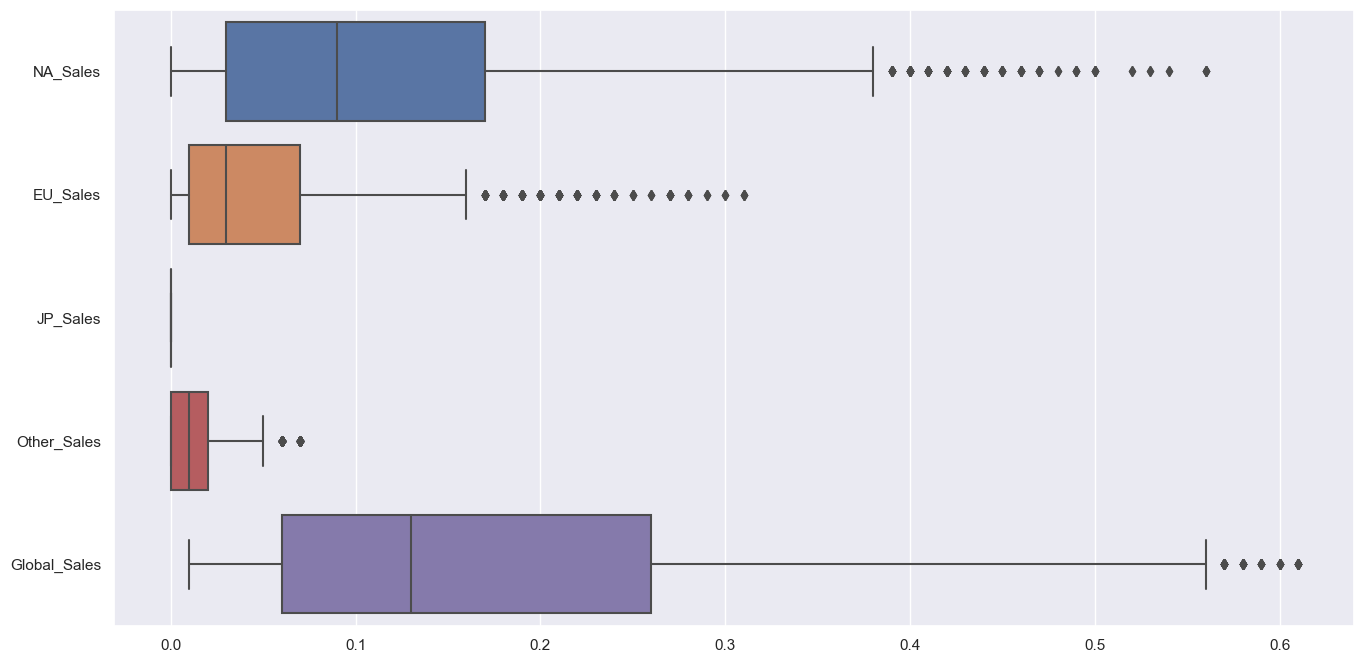

In [37]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numDF[['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales']], orient = "h")

Since all the JP_Sales values are zero, we will remove the column since it will not serve the purpose to predict the video game success rate

<AxesSubplot:>

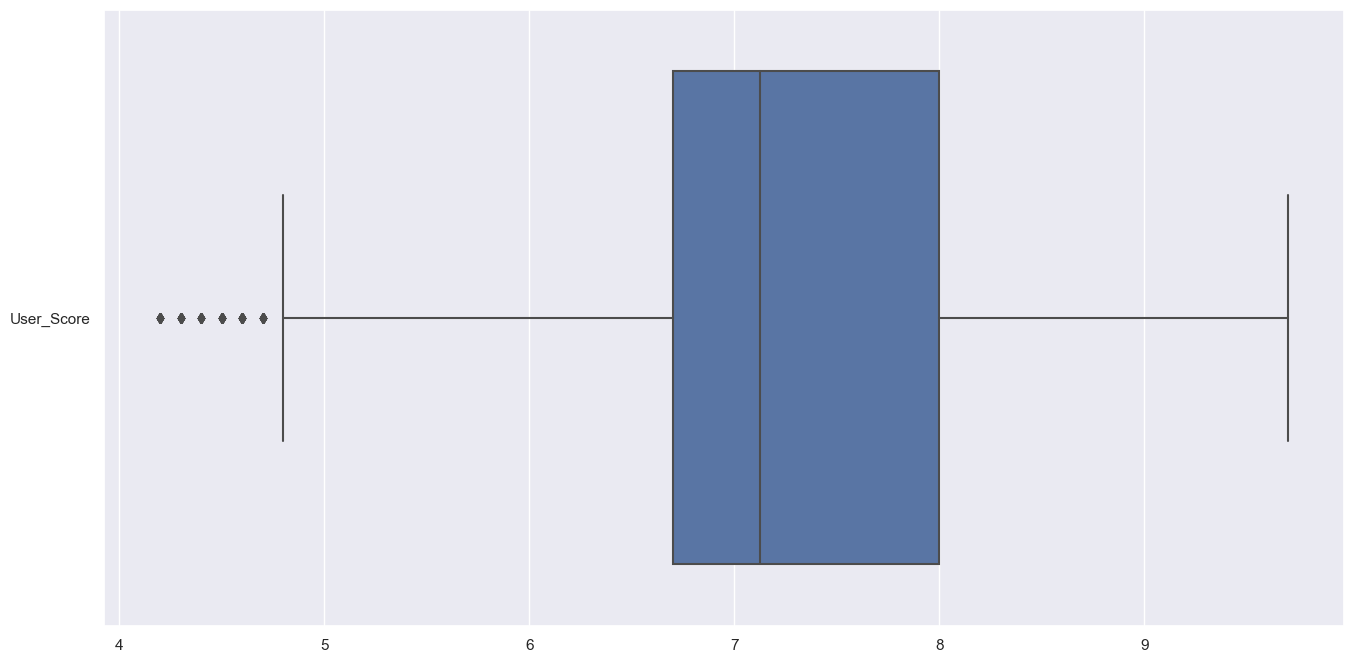

In [38]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numDF[['User_Score']], orient = "h")

<AxesSubplot:>

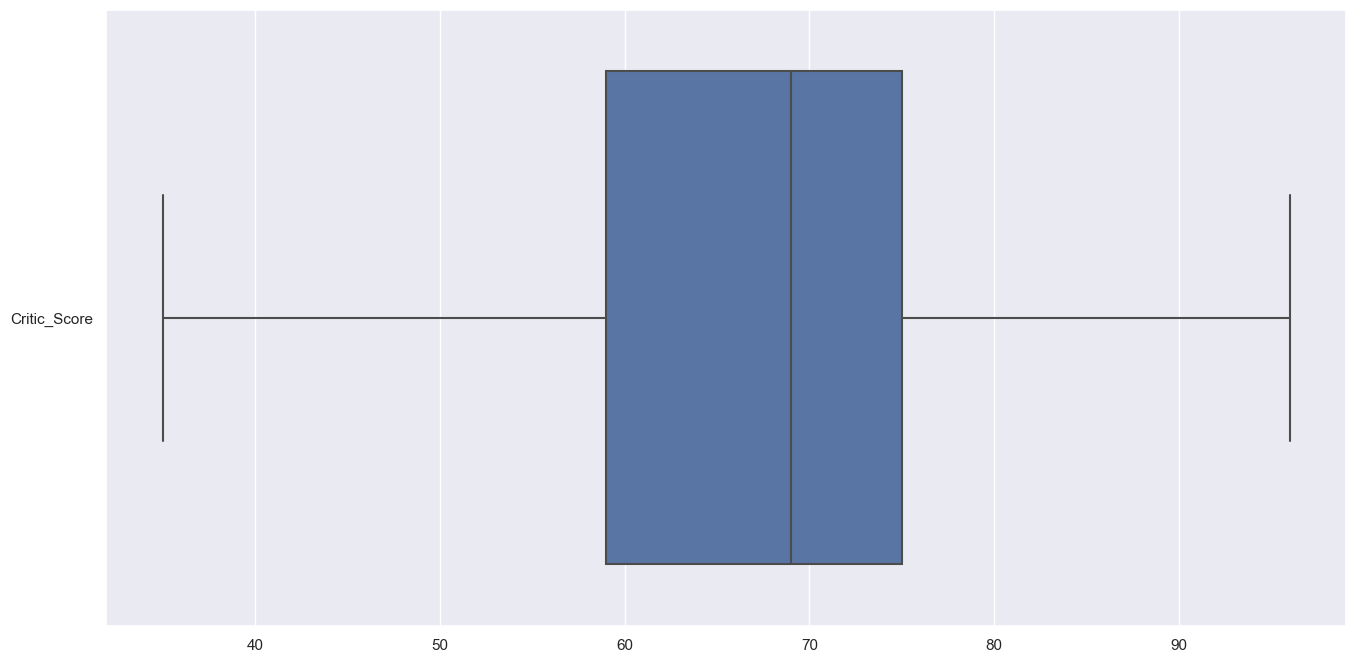

In [39]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = numDF[['Critic_Score']], orient = "h")

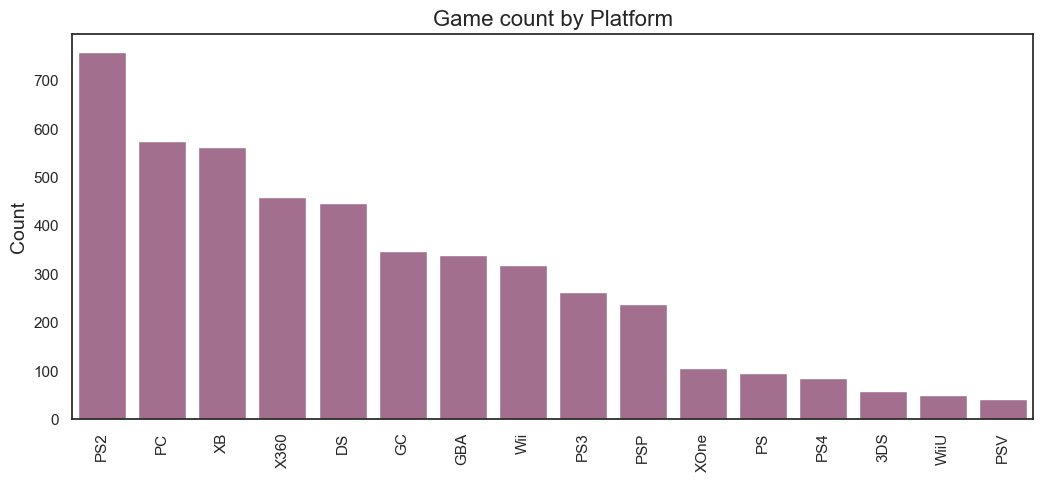

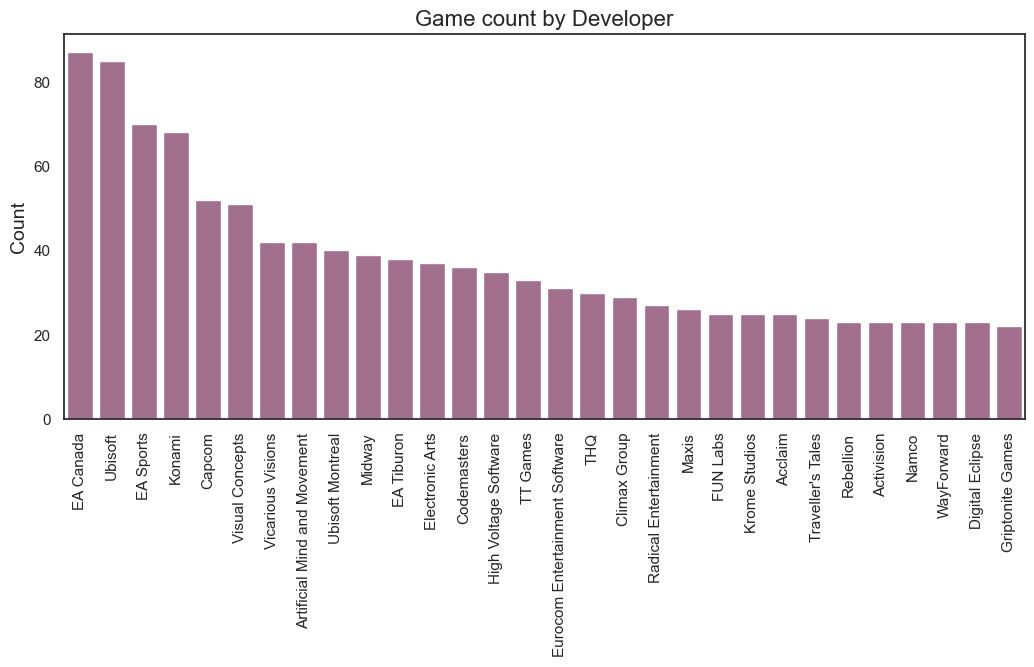

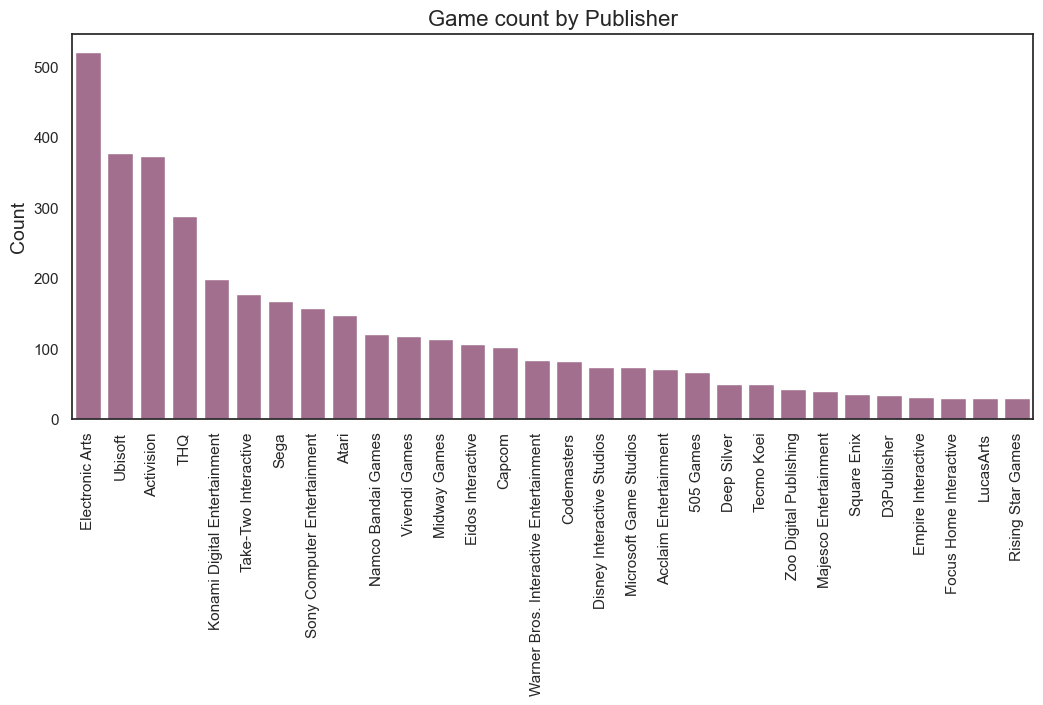

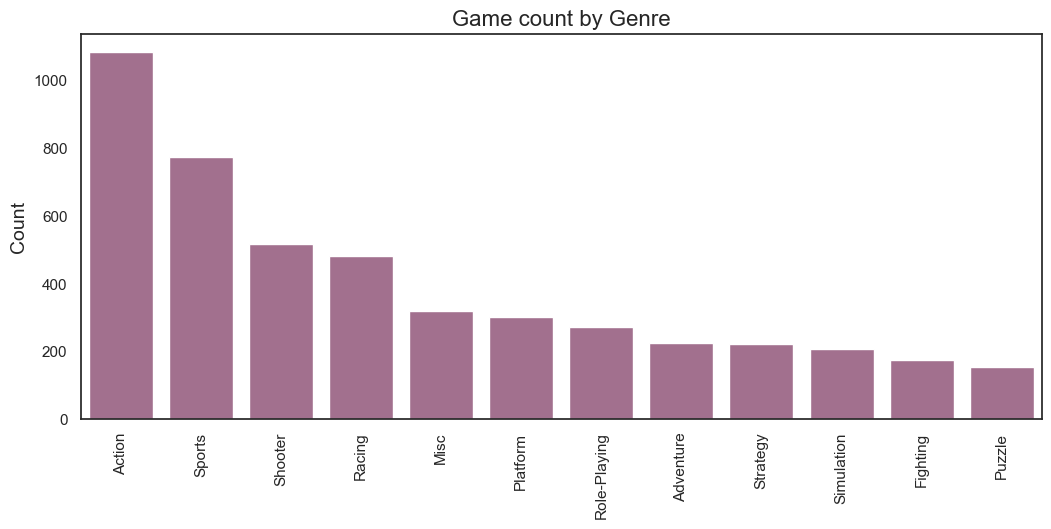

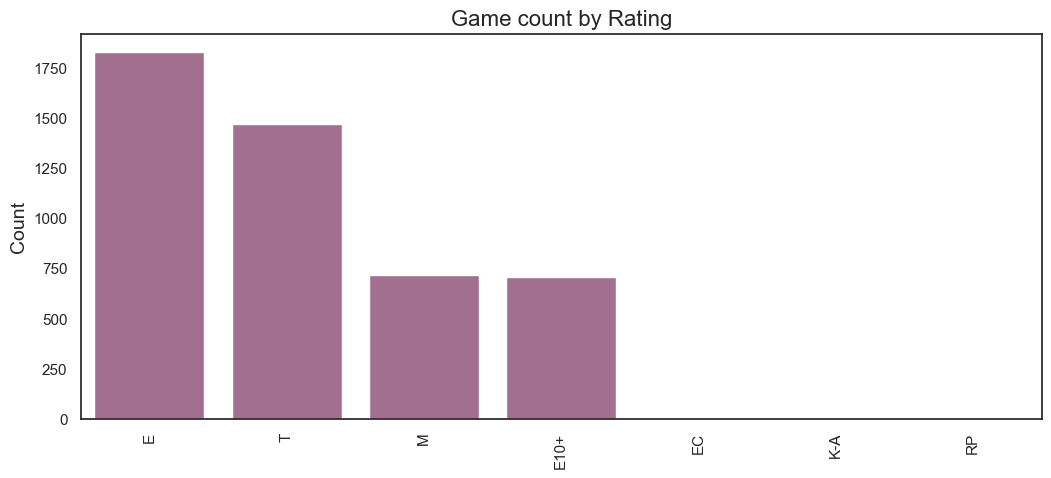

In [40]:
cols = ['Platform', 'Developer', 'Publisher', 'Genre', 'Rating']

for col in cols:
    chart = vdgamedata[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sb.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sb.barplot(x=col, y='Name', data=chart[:30], palette=sb.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.5, light=.5, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

Text(0, 0.5, 'Global Sales')

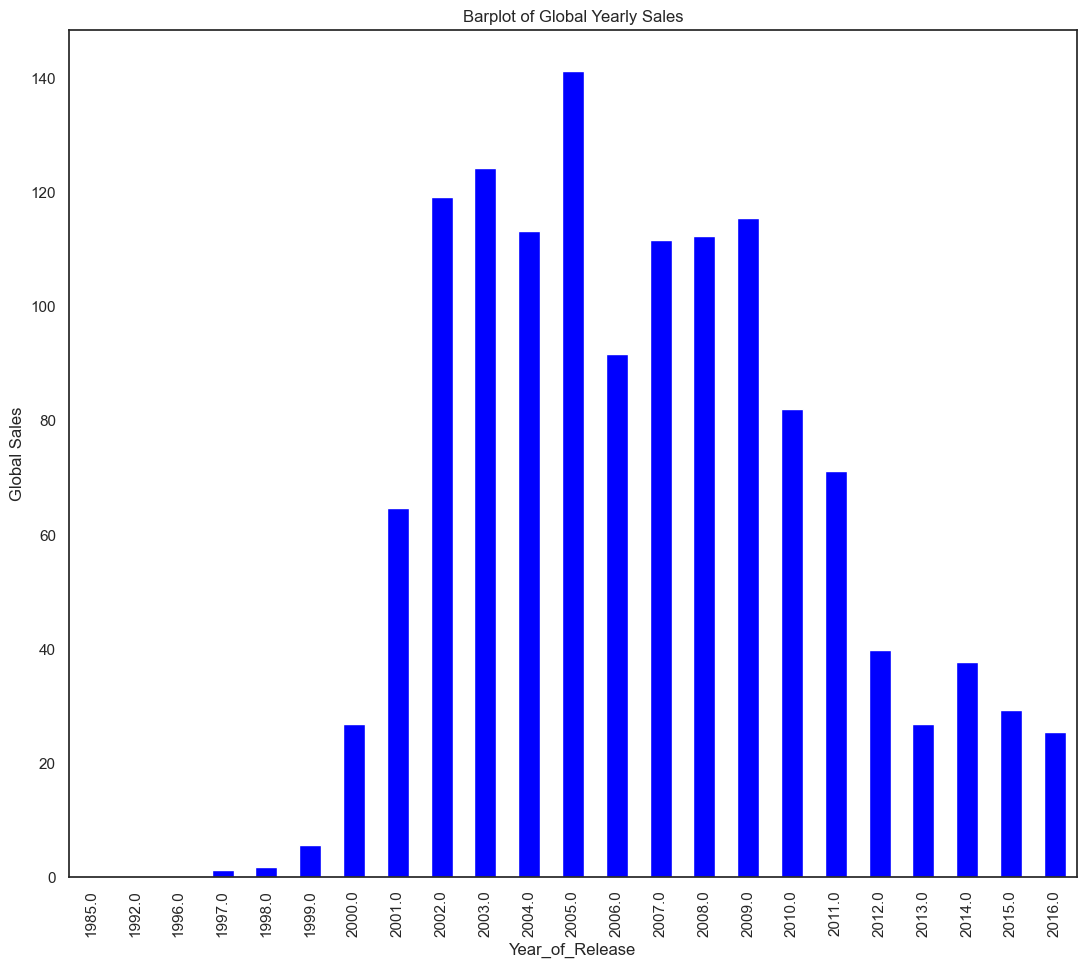

In [41]:
yearlySales = vdgamedata.groupby(['Year_of_Release']).Global_Sales.sum()
yearlySales.plot(kind='bar',stacked=True, colormap= 'winter',  
                           grid=False, figsize=(13,11))
plt.title('Barplot of Global Yearly Sales')
plt.ylabel('Global Sales')

From the global sales plot, we can see that a large portion of the sales were between the 2001 to 2011 period.

Text(0, 0.5, 'Global Sales')

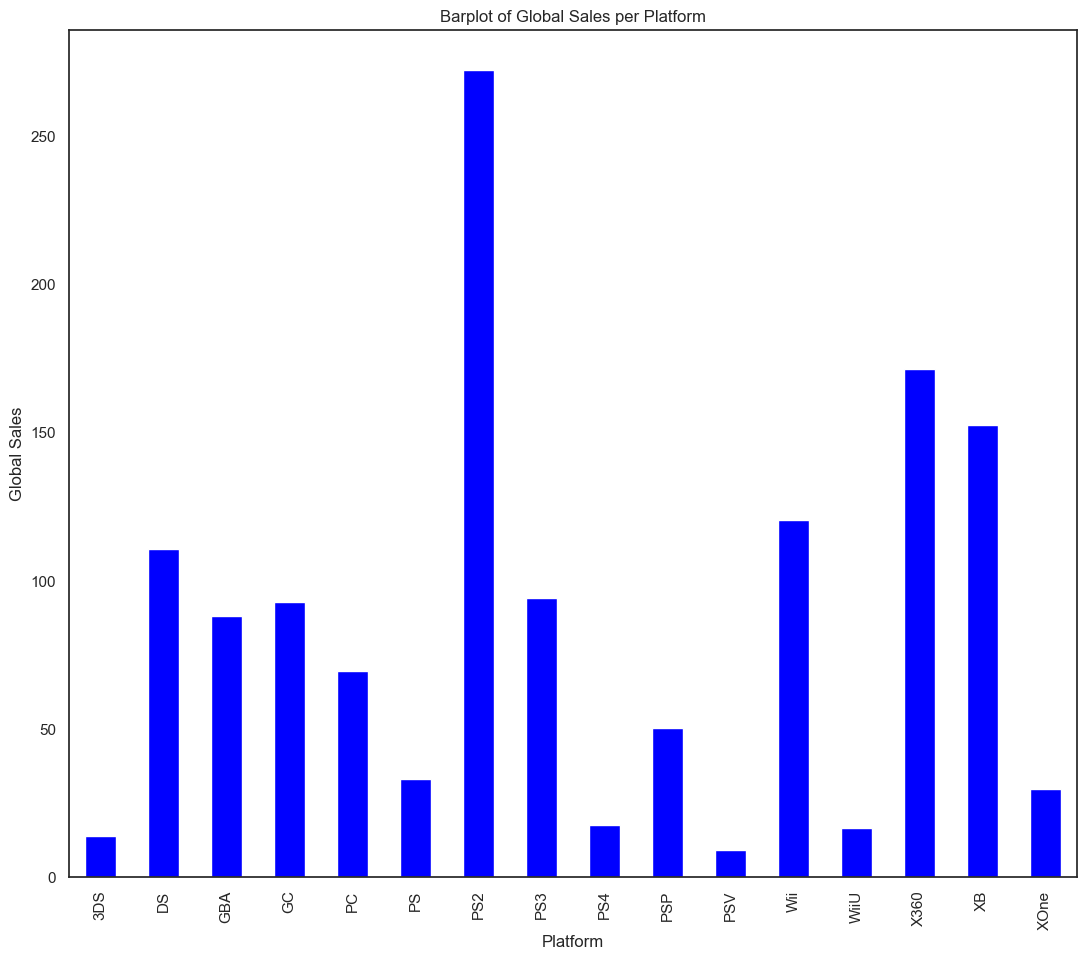

In [42]:
yearlySales = vdgamedata.groupby(['Platform']).Global_Sales.sum()
yearlySales.plot(kind='bar',stacked=True, colormap= 'winter',  
                           grid=False, figsize=(13,11))
plt.title('Barplot of Global Sales per Platform')
plt.ylabel('Global Sales')

Large majority of games are on the PS2 platform.

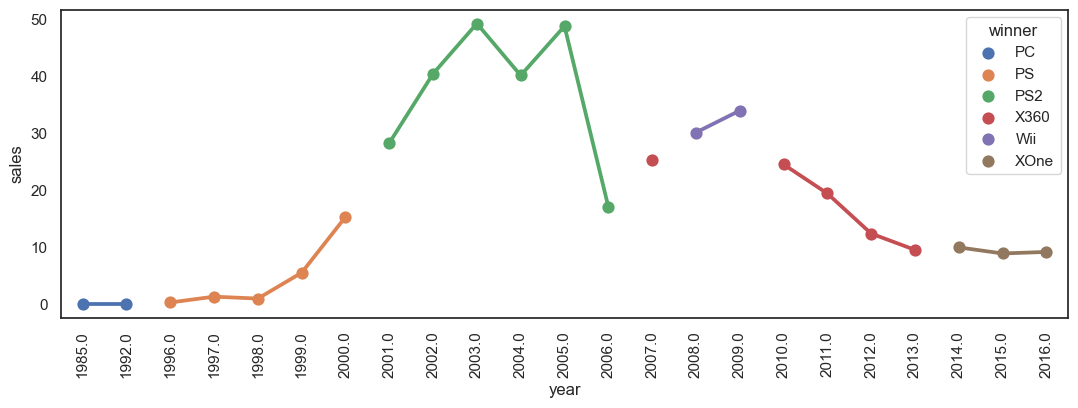

In [43]:
#temp is the sum of all variables for each platform by year
temp = vdgamedata.groupby(['Year_of_Release', 'Platform']).sum().reset_index().groupby('Year_of_Release')

platform_yearly_winner_df = pd.DataFrame()

for year, group in temp:
    current_year = temp.get_group(year)
    this_year_max_sales = 0.0
    current_year_winner = ""
    row = {'year':"", 'winner':"", 'sales':""}
    for index, platform_data in current_year.iterrows():
        if platform_data.Global_Sales > this_year_max_sales:
            this_year_max_sales = platform_data.Global_Sales
            current_year_winner = platform_data.Platform
    
    row['year'] = year
    row['winner'] = current_year_winner
    row['sales'] = this_year_max_sales
    platform_yearly_winner_df = platform_yearly_winner_df.append(row, ignore_index=True)

fig = plt.figure(figsize=(13, 4))

g = sb.pointplot(x = platform_yearly_winner_df.year ,
              y = platform_yearly_winner_df.sales , 
              hue = platform_yearly_winner_df.winner);

g.set_xticklabels(g.get_xticklabels(), rotation=90);

The graph shows the most popular platform sales from 1985 to 2016.
The most notable observation is that the PS2 sales were most dominant from 2001 to 2005.

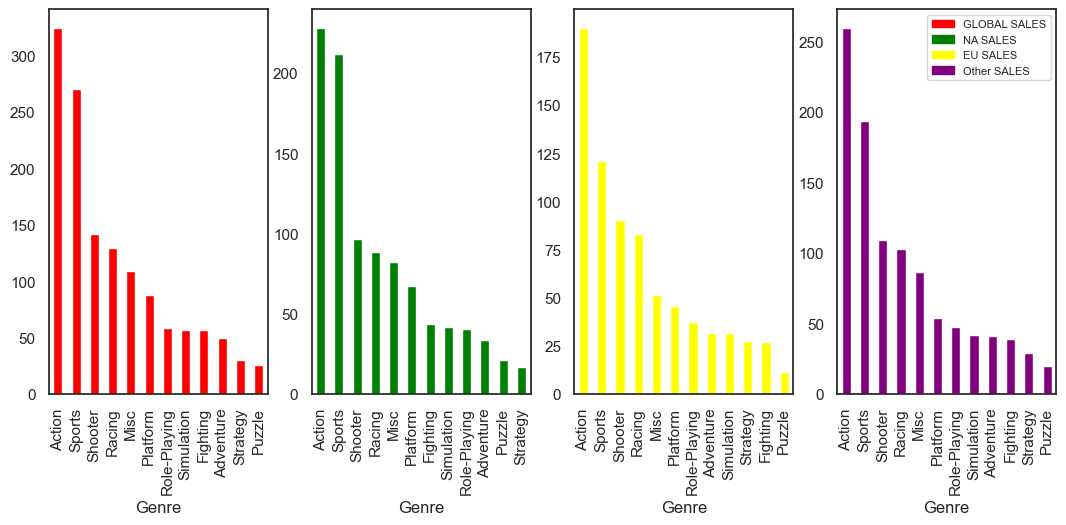

In [44]:
x = vdgamedata.groupby(['Genre']).sum().copy()
f, axes = plt.subplots(1, 4, figsize=(48, 24))
ax = x.Global_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5), color = 'red', ax = axes[0]);
bx = x.NA_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5), color = 'green', ax = axes[1]);
cx = x.EU_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5), color = 'yellow', ax = axes[2]);
ex = x.Other_Sales.sort_values(ascending=False).plot(kind='bar', figsize=(13, 5), color = 'purple', ax = axes[3]);

red_patch = mpatches.Patch(color='red', label='GLOBAL SALES')
green_patch = mpatches.Patch(color='green', label='NA SALES')
yellow_patch = mpatches.Patch(color='yellow', label='EU SALES')
purple_patch = mpatches.Patch(color='purple', label='Other SALES')
plt.legend(handles=[red_patch, green_patch, yellow_patch, purple_patch], loc='upper right', fontsize = 8)

From the data, it can be seen that Action games are the most popular among the other genres for both regional and global sales, regardless of the region. Similarly, Sports, Racing and Shooter are also among the top favourites.

<AxesSubplot:>

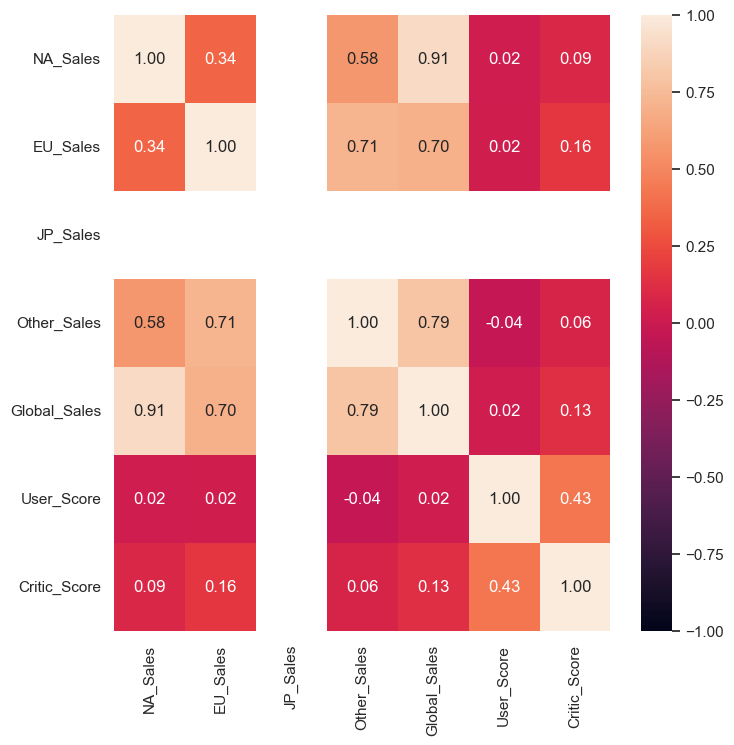

In [45]:
f = plt.figure(figsize=(8, 8))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

As seen from the graph, there is no strong correlation between the predictors and Sales values. Thus, we need to check for the correlation between categorical values.

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

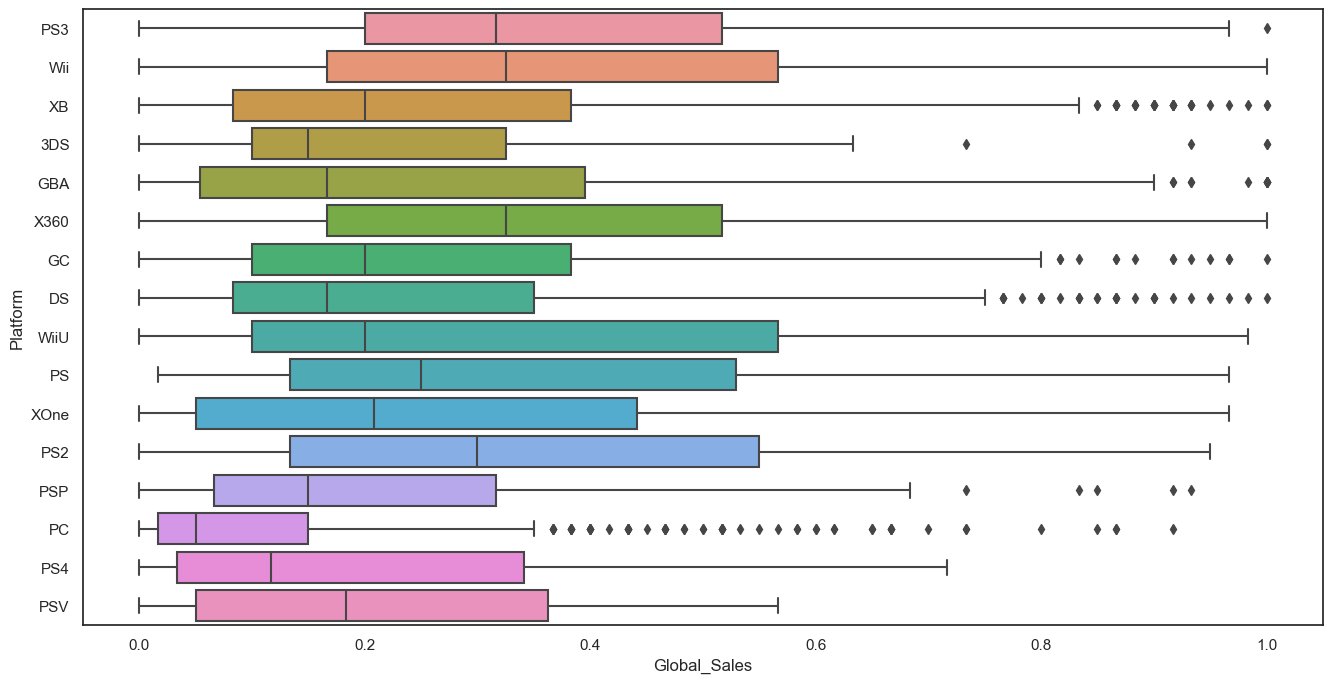

In [46]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data=vdgamedata, x='Global_Sales', y='Platform', orient = "h")

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

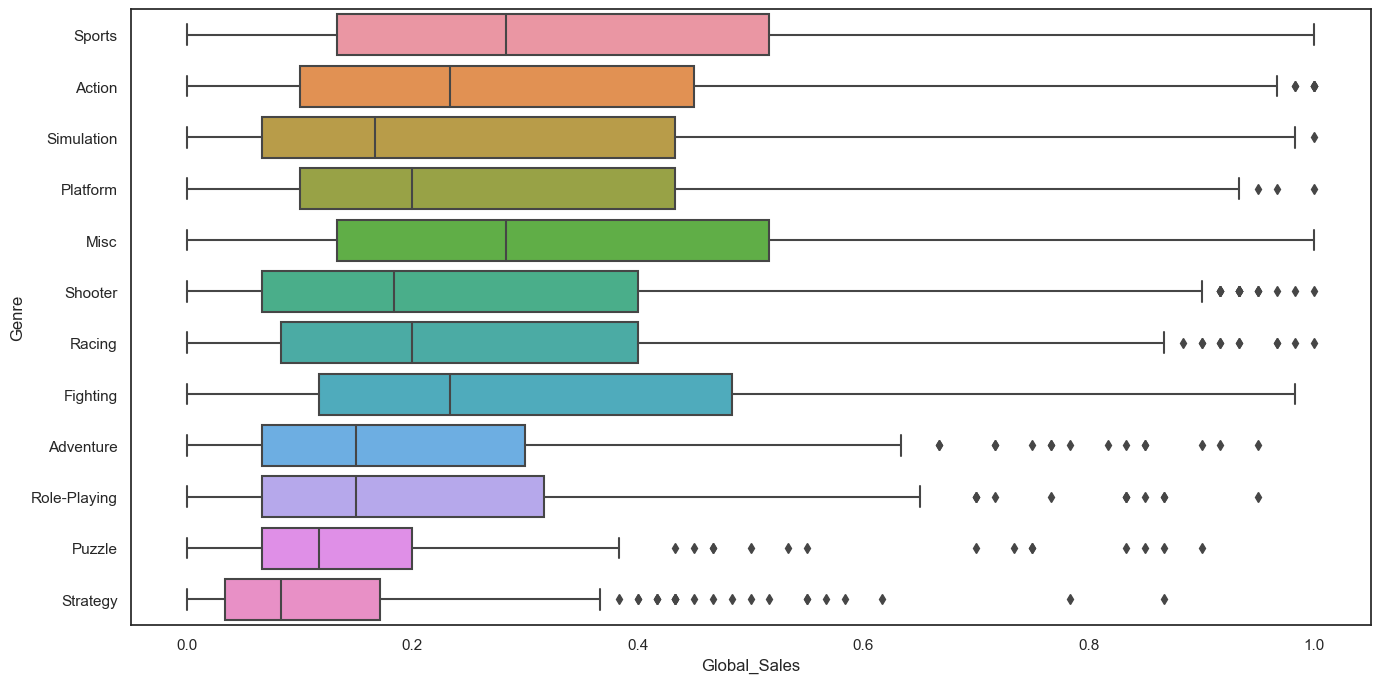

In [47]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data=vdgamedata, x='Global_Sales', y='Genre', orient = "h")

<AxesSubplot:xlabel='Global_Sales', ylabel='Rating'>

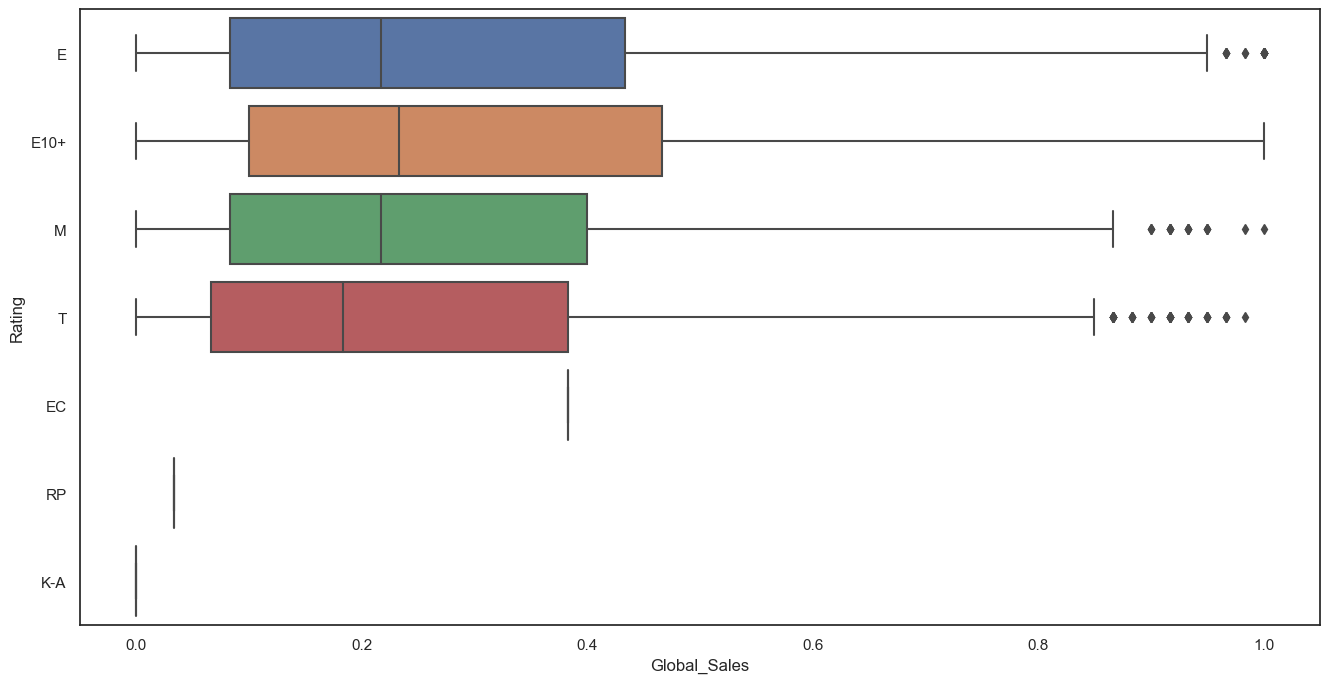

In [48]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data=vdgamedata, x='Global_Sales', y='Rating', orient = "h")

<AxesSubplot:xlabel='Global_Sales', ylabel='Publisher'>

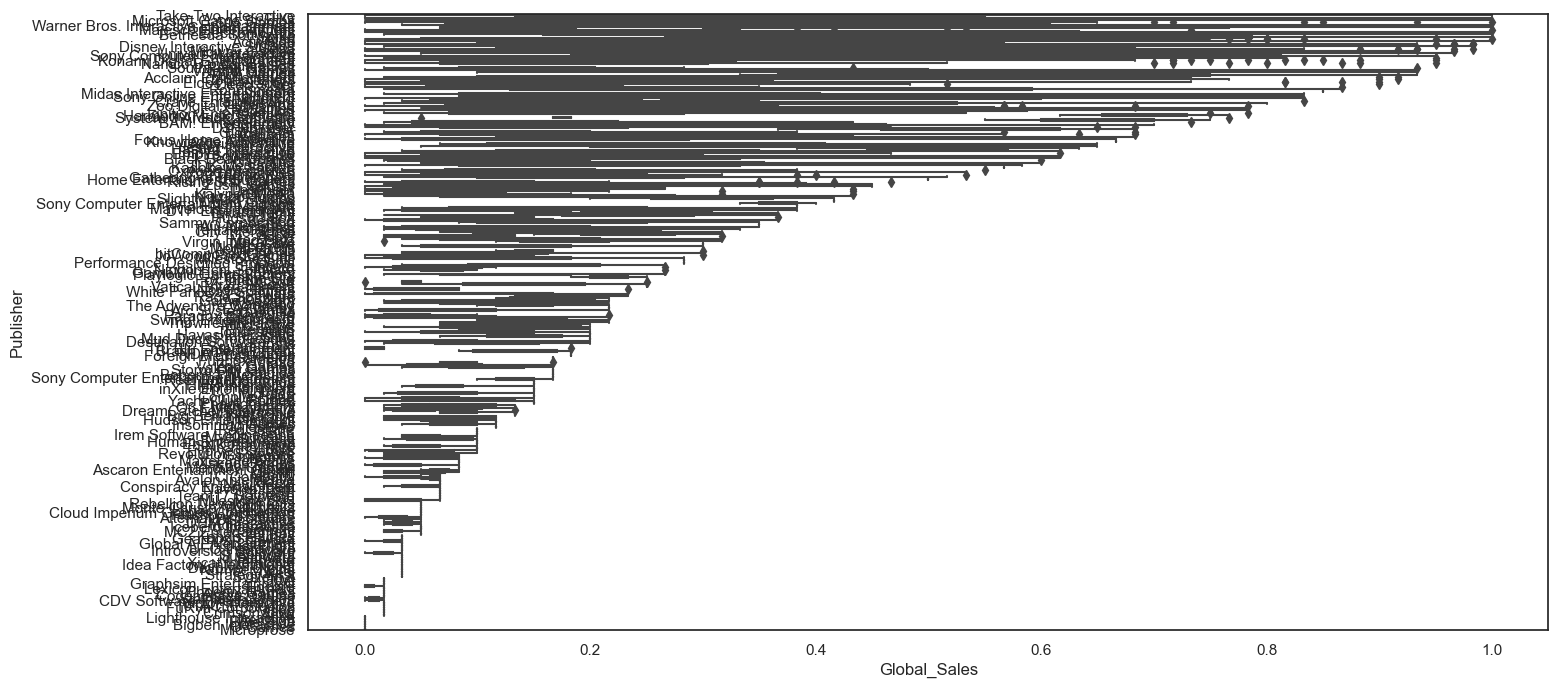

In [49]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data=vdgamedata, x='Global_Sales', y='Publisher', orient = "h")

From all the plots, we can see that there is a strong correlation for the Publishers with respect to Global Sales.

Also, there is somewhat of a correlation between Genre and Global Sales.

Text(0.5, 1.0, 'Relatonship between critic score and global sale')

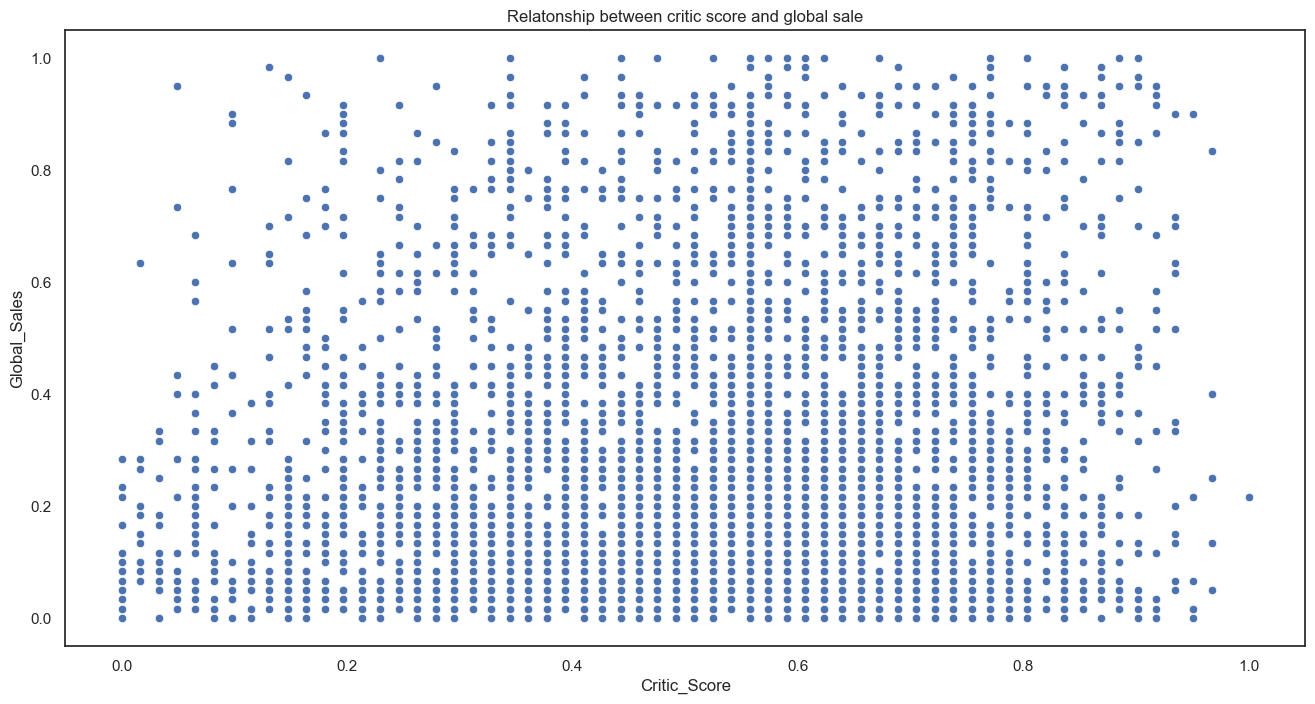

In [50]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(x=vdgamedata['Critic_Score'], y=vdgamedata['Global_Sales'])
plt.title('Relatonship between critic score and global sale')

From the graph above, there is no correlation between critic score and global sale

# Definition of Success

We defined a game to be successful as long as any of the conditions are met:
- The Global_Sales is greater than or equal to the median Global_Sales
- The NA_Sales is greater than or equal to the median NA_Sales
- The EU_Sales is greater than or equal to the median EU_Sales
- The Other_Sales is greater than or equal to the median Other_Sales

In [51]:
# define the success factor based on global sales
# condition - if any of the sales are above the mean 

# Create a new column 'Success Rate' based on Sales columns
def success_rate(global_sales, na_sales, eu_sales, other_sales):
    if global_sales >= vdgamedata['Global_Sales'].median():
        return "Success"
    elif na_sales >= vdgamedata['NA_Sales'].median():
        return "Success"
    elif eu_sales >= vdgamedata['EU_Sales'].median():
        return "Success"
    elif other_sales >= vdgamedata['Other_Sales'].median():
        return "Success"
    else:
        return "No Success"
    
vdgamedata['Success Rate'] = vdgamedata.apply(lambda x: success_rate(x['Global_Sales'], x['NA_Sales'], x['EU_Sales'], x['Other_Sales']), axis=1)
vdgamedata.sample(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Success Rate
4933,Ice Age 2: The Meltdown,PS2,2006.0,Platform,Vivendi Games,0.339286,0.483871,0.0,0.714286,0.633333,0.540984,19.0,0.690909,6.0,Eurocom Entertainment Software,E10+,Success
8767,NCAA GameBreaker 2001,PS2,2000.0,Sports,Sony Computer Entertainment,0.125000,0.193548,0.0,0.285714,0.233333,0.360656,9.0,0.532292,NaN,989 Sports,E,Success
6180,NCAA March Madness 2005,XB,2004.0,Sports,Electronic Arts,0.375000,0.193548,0.0,0.142857,0.450000,0.737705,18.0,0.654545,4.0,EA Canada,E,Success
8060,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,Warner Bros. Interactive Entertainment,0.125000,0.225806,0.0,0.428571,0.283333,0.475410,19.0,0.472727,21.0,Traveller's Tales,E10+,Success
7824,Frogger's Adventures 2: The Lost Wand,GBA,2002.0,Adventure,Konami Digital Entertainment,0.250000,0.161290,0.0,0.000000,0.300000,0.655738,4.0,0.532292,NaN,Konami,E,Success
11452,Persona 4: Arena Ultimax,X360,2014.0,Fighting,Atlus,0.107143,0.032258,0.0,0.142857,0.116667,0.819672,15.0,0.581818,35.0,Arc System Works,T,Success
10543,Hunter: The Reckoning,GC,2002.0,Action,Virgin Interactive,0.142857,0.064516,0.0,0.000000,0.150000,0.573770,13.0,0.618182,7.0,High Voltage Software,M,No Success
15847,Dungeons - The Dark Lord,PC,2011.0,Strategy,Kalypso Media,0.000000,0.032258,0.0,0.000000,0.016667,0.606557,6.0,0.254545,16.0,Kalypso,M,No Success
15586,Worldwide Soccer Manager 2007,PC,2006.0,Sports,Sega,0.000000,0.064516,0.0,0.000000,0.016667,0.852459,17.0,0.532292,NaN,Sports Interactive,E,No Success
5548,The Witcher: Enhanced Edition,PC,2008.0,Role-Playing,Atari,0.571429,0.032258,0.0,0.000000,0.516667,0.836066,30.0,0.781818,1660.0,CD Projekt Red Studio,M,Success


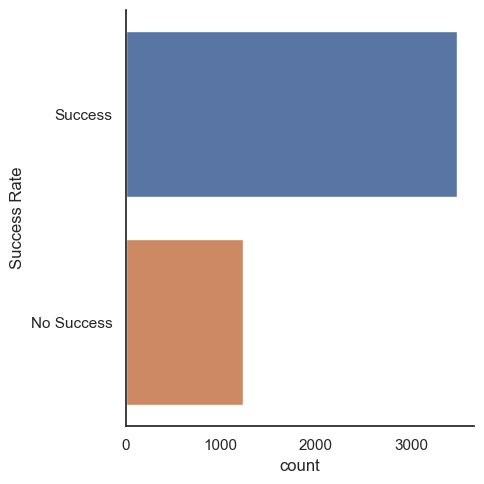

In [52]:
sb.catplot(y = "Success Rate", data = vdgamedata, kind = "count")

After our data cleaning, our dataset is only left with over 1000 unsuccessful video games, while there are over 3000 successful games. Thus, there is a significant imbalance of the dataset.

In [53]:
trainDF = pd.DataFrame(vdgamedata[['Genre', 'Publisher', 'Year_of_Release', 'Success Rate']])
trainDF

,Genre,Publisher,Year_of_Release,Success Rate
3273,Sports,Take-Two Interactive,2008.0,Success
3274,Action,THQ,2007.0,Success
3276,Sports,Microsoft Game Studios,2002.0,Success
3279,Simulation,505 Games,2011.0,Success
3280,Action,Warner Bros. Interactive Entertainment,2012.0,Success
...,...,...,...,...
16699,Action,Titus,2001.0,No Success
16700,Shooter,Destineer,2011.0,No Success
16701,Puzzle,Ubisoft,2003.0,No Success
16702,Puzzle,Majesco Entertainment,2008.0,No Success


In [54]:
import category_encoders as ce
# Select the numeric columns
numeric_subset = trainDF.select_dtypes("number")

# Select the categorical column
categorical_subset = trainDF[["Publisher", "Genre"]]
target_col = trainDF['Success Rate']

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

# binary encoding
bi_encoder = ce.BinaryEncoder()
target_col = bi_encoder.fit_transform(target_col)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset, target_col], axis = 1)

To achieve a better prediction using the categorical columns as predictors, we used one hot encoding on the Publisher and Genre columns.

In [55]:
features.sample(10)

,Year_of_Release,Publisher_1,Publisher_2,Publisher_3,Publisher_4,Publisher_5,Publisher_6,Publisher_7,Publisher_8,Publisher_9,...,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11,Genre_12,Success Rate_0,Success Rate_1
7617,2007.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8278,2013.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4236,2001.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5078,2002.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3923,2004.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8786,2010.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3778,2004.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5934,2012.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10721,2004.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12315,2002.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Machine Learning Models

In [56]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [57]:
y = features['Success Rate_1']   # Response
x = features.drop(['Success Rate_1', 'Success Rate_0'], axis=1)     # Predictor

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

# SMOTE oversampling
sm = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors = 5)

# Fit the SMOTE oversampler to the training data
X_res, y_res = sm.fit_resample(X_train, y_train)

We will be breaking down our train dataset to 80:20 ratio. Since our target variable (Success Rate) is imbalanced, we will be using Synthetic Minority Oversampling Technique to oversample our data in a balanced way. The reason why we do oversampling is that our data will not be biased towards one response since we give our model balanced target variables.

In [58]:
def classification_metric(y_train, y_train_pred, y_test, y_test_pred):
    # Calculate metrics for train data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    # Calculate metrics for test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model - Train Dataset")
    print("Accuracy: \t", accuracy_train)
    print("Precision: \t", precision_train)
    print("Recall: \t", recall_train)
    print("F1 Score: \t", f1_train)
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model - Test Dataset")
    print("Accuracy: \t", accuracy_test)
    print("Precision: \t", precision_test)
    print("Recall: \t", recall_test)
    print("F1 Score: \t", f1_test)
    print()

    # Generate classification report for test data
    target_names = ['Class 0', 'Class 1']
    report = classification_report(y_test, y_test_pred, target_names=target_names)
    print(report)
    
    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

To evaluate our classification models, we will be using precision, accuracy, recall and f1 score. We cannot solely depend on the accuracy metric since our data might be underfit or overfit. We will be using confusion matrix to see the amount of **True Positive** and **True Negative** which our model correctly predict the outcomes.

- **Precision** : Accuracy of positive predictions
- **Recall** : Fraction of positives that were correctly identified
- **F1 score** : What percent of positive predictions were correct?

Below, we will be using classification models such as logisitic regression, random Forest Classification, Stochastic Gradient Descent and Ridge Classification.

### Logistic Regression

Goodness of Fit of Model - Train Dataset
Accuracy: 	 0.6693121693121693
Precision: 	 0.8223905723905723
Recall: 	 0.702372393961179
F1 Score: 	 0.7576580069794493

Goodness of Fit of Model - Test Dataset
Accuracy: 	 0.6613756613756614
Precision: 	 0.813614262560778
Recall: 	 0.71004243281471
F1 Score: 	 0.7583081570996979

              precision    recall  f1-score   support

     Class 0       0.38      0.52      0.43       238
     Class 1       0.81      0.71      0.76       707

    accuracy                           0.66       945
   macro avg       0.59      0.61      0.60       945
weighted avg       0.70      0.66      0.68       945



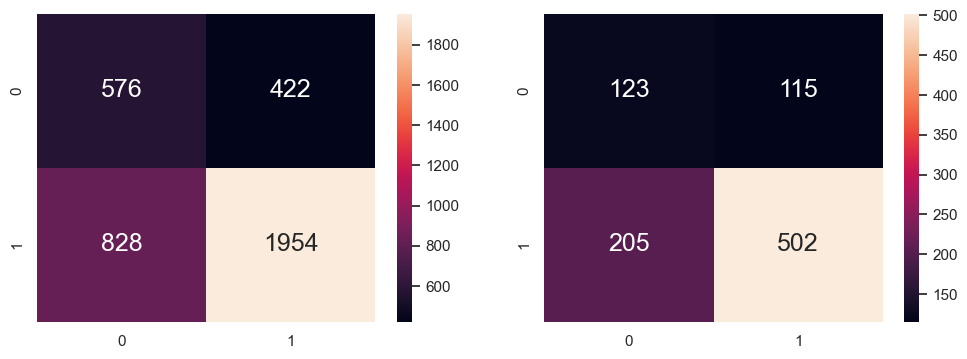

In [59]:
# Create a logistic regression classifier
lr = LogisticRegression(random_state=1)

# Fit the model on the training data
lr.fit(X_res, y_res)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

classification_metric(y_train, y_train_pred, y_test, y_test_pred)

### Ridge Classifier

Goodness of Fit of Model - Train Dataset
Accuracy: 	 0.6693121693121693
Precision: 	 0.8223905723905723
Recall: 	 0.702372393961179
F1 Score: 	 0.7576580069794493

Goodness of Fit of Model - Test Dataset
Accuracy: 	 0.6613756613756614
Precision: 	 0.813614262560778
Recall: 	 0.71004243281471
F1 Score: 	 0.7583081570996979

              precision    recall  f1-score   support

     Class 0       0.38      0.52      0.43       238
     Class 1       0.81      0.71      0.76       707

    accuracy                           0.66       945
   macro avg       0.59      0.61      0.60       945
weighted avg       0.70      0.66      0.68       945



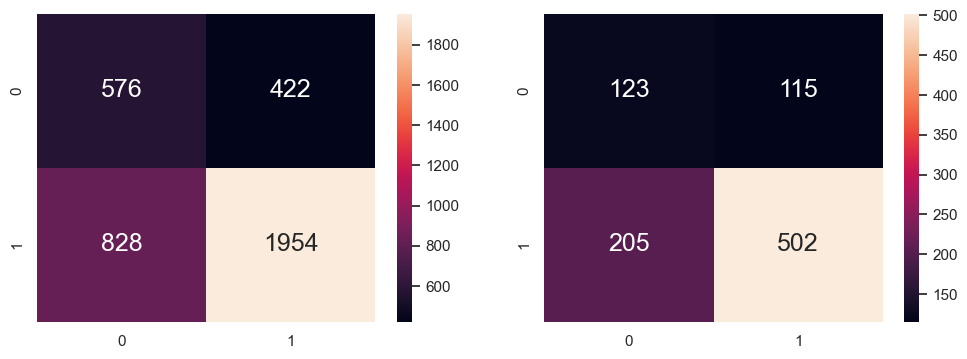

In [60]:
from sklearn.linear_model import RidgeClassifier

# Create a RidgeClassifier object with alpha=1.0 (default)
ridge_clf = RidgeClassifier()

# Train the model on the training data
ridge_clf.fit(X_res, y_res)

# Make predictions on the testing data
y_pred = ridge_clf.predict(X_test)

classification_metric(y_train, y_train_pred, y_test, y_test_pred)

### Random Forest Classifier

Goodness of Fit of Model - Train Dataset
Accuracy: 	 0.6693121693121693
Precision: 	 0.8223905723905723
Recall: 	 0.702372393961179
F1 Score: 	 0.7576580069794493

Goodness of Fit of Model - Test Dataset
Accuracy: 	 0.6613756613756614
Precision: 	 0.813614262560778
Recall: 	 0.71004243281471
F1 Score: 	 0.7583081570996979

              precision    recall  f1-score   support

     Class 0       0.38      0.52      0.43       238
     Class 1       0.81      0.71      0.76       707

    accuracy                           0.66       945
   macro avg       0.59      0.61      0.60       945
weighted avg       0.70      0.66      0.68       945



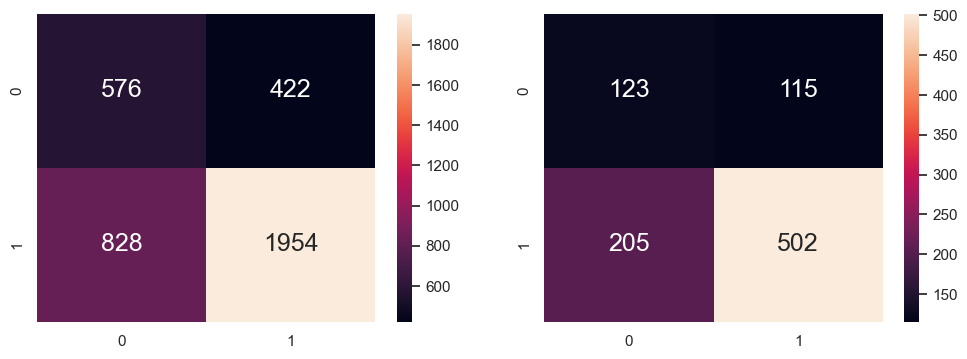

In [61]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model on the training data
rfc.fit(X_res, y_res)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

classification_metric(y_train, y_train_pred, y_test, y_test_pred)

### SGD Classifier

Goodness of Fit of Model - Train Dataset
Accuracy: 	 0.735978835978836
Precision: 	 0.735978835978836
Recall: 	 1.0
F1 Score: 	 0.8479122218835721

Goodness of Fit of Model - Test Dataset
Accuracy: 	 0.7481481481481481
Precision: 	 0.7481481481481481
Recall: 	 1.0
F1 Score: 	 0.8559322033898306

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       238
     Class 1       0.75      1.00      0.86       707

    accuracy                           0.75       945
   macro avg       0.37      0.50      0.43       945
weighted avg       0.56      0.75      0.64       945



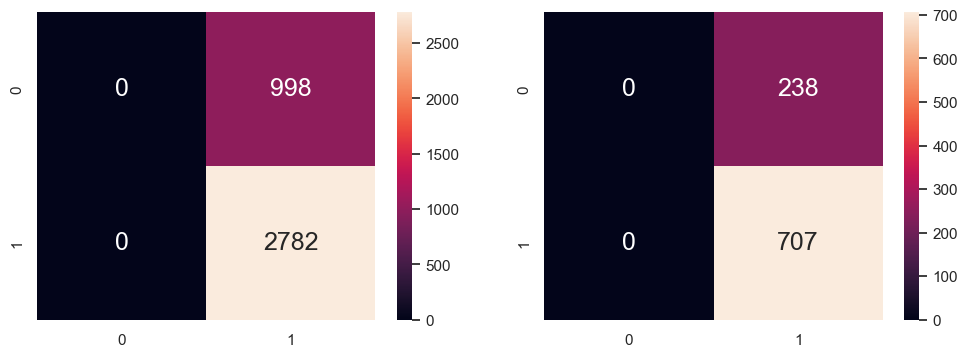

In [62]:
from sklearn.linear_model import SGDClassifier

# Create an SGDClassifier object with default hyperparameters
sgd_clf = SGDClassifier(loss='log')

# Train the model on the training data
sgd_clf.fit(X_res, y_res)

y_train_pred = sgd_clf.predict(X_train)
y_test_pred = sgd_clf.predict(X_test)

classification_metric(y_train, y_train_pred, y_test, y_test_pred)

### Hyperparameters tuning

To find out the best parameters available for our models, we will be using grid search to select the best parameters for our model

In [63]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest Classifier
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=1)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=3)
grid_search.fit(X_res, y_res)

# Print the best hyperparameters and score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.612 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.640 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.622 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.639 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.674 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.623 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.657 total time=   0.0s
[CV 3/5] END

[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.657 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.668 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.685 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.720 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.623 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.649 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.640 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=2, min_samples

[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.683 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.718 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.611 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.649 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.641 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.673 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.690 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=1, mi

[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.631 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.648 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.670 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.686 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.709 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.624 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.667 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=2, min_sampl

[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.665 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.680 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.710 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.642 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.661 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.666 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.695 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, min_samples_leaf=4, min_sam

[CV 5/5] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.729 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.620 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.677 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.668 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.703 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.725 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.660 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_

[CV 1/5] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.670 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.688 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.686 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.731 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.645 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.661 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_

[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.718 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.816 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.817 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.847 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.665 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.724 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.819 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=None, 

[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.783 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.657 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.679 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.726 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.734 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.769 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=None, min_s

[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.611 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.645 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.654 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.651 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.676 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.603 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=1, min_samples_split=10, n_estimators=10;, score=0.627 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=1,

[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.654 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.650 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.676 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.603 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.627 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.615 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.634 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=2, min_samples_leaf=4, 

[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.695 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.636 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.642 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.634 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.652 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=10;, score=0.692 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.637 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=1, min_s

[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.634 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.655 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.688 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.700 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.632 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.666 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, min_samples_leaf=

[CV 3/5] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.695 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.719 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.744 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.660 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.674 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.684 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.712 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=10, min_samples_le

[CV 5/5] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.744 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.653 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.678 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.680 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.737 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10;, score=0.637 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=10, min_samples_

[CV 1/5] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.644 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.675 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.684 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.710 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.737 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.674 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.710 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, mi

[CV 2/5] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.705 total time=   0.4s
[CV 3/5] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.798 total time=   0.4s
[CV 4/5] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.806 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.828 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.663 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.700 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=10;, score=0.765 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=None

[CV 2/5] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.681 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.732 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.755 total time=   0.3s
[CV 5/5] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.785 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.675 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.676 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=10;, score=0.721 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=N

Goodness of Fit of Model - Train Dataset
Accuracy: 	 0.9122933141624731
Precision: 	 0.9016106442577031
Recall: 	 0.9255930984902947
F1 Score: 	 0.9134444838595246

Goodness of Fit of Model - Test Dataset
Accuracy: 	 0.6793650793650794
Precision: 	 0.8126934984520123
Recall: 	 0.7425742574257426
F1 Score: 	 0.7760532150776053

              precision    recall  f1-score   support

     Class 0       0.39      0.49      0.44       238
     Class 1       0.81      0.74      0.78       707

    accuracy                           0.68       945
   macro avg       0.60      0.62      0.61       945
weighted avg       0.71      0.68      0.69       945



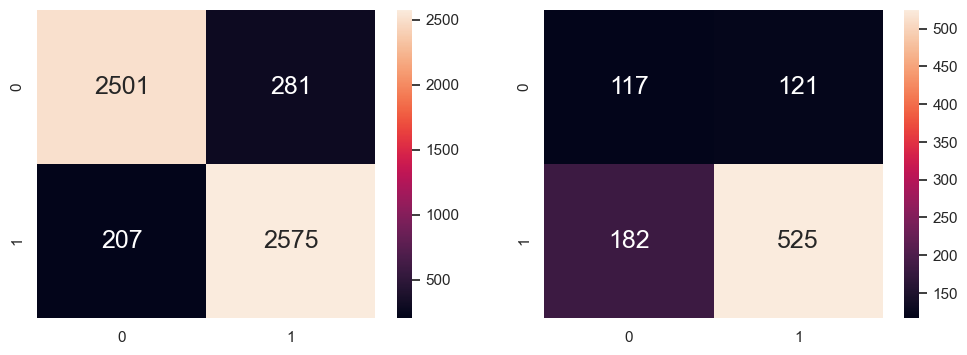

In [64]:
# Random Forest Classification using the gridsearch hyperparameters
rfc = RandomForestClassifier(bootstrap = True, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, random_state=1)

# Fit the model on the training data
rfc.fit(X_res, y_res)

y_train_pred = rfc.predict(X_res)
y_test_pred = rfc.predict(X_test)

classification_metric(y_res, y_train_pred, y_test, y_test_pred)

In [65]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['lbfgs', 'liblinear'],
}

# Create a Logistic Regression object
logreg = LogisticRegression(random_state=1)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=3)
grid_search.fit(X_res, y_res)

# Print the best hyperparameters and score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.500 total time=   0.0s
[CV 1/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.588 total time=   0.0s
[CV 2/5] END .C=0.001, penalty=l

[CV 1/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.571 total time=   0.9s
[CV 2/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.646 total time=   0.2s
[CV 3/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.813 total time=   0.8s
[CV 4/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.813 total time=   0.7s
[CV 5/5] END C=100.0, penalty=l1, solver=liblinear;, score=0.844 total time=   0.5s
[CV 1/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.600 total time=   0.0s
[CV 2/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.666 total time=   0.0s
[CV 3/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.745 total time=   0.0s
[CV 4/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.746 total time=   0.0s
[CV 5/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.786 total time=   0.0s
[CV 1/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.572 total time=   0.0s
[CV 2/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.648 total time=   0.0s
[CV 3/5

Goodness of Fit of Model - Train Dataset
Accuracy: 	 0.7852264557872034
Precision: 	 0.7258753202391118
Recall: 	 0.9166067577282531
F1 Score: 	 0.8101667990468626

Goodness of Fit of Model - Test Dataset
Accuracy: 	 0.7534391534391535
Precision: 	 0.800761421319797
Recall: 	 0.8925035360678925
F1 Score: 	 0.8441471571906354

              precision    recall  f1-score   support

     Class 0       0.52      0.34      0.41       238
     Class 1       0.80      0.89      0.84       707

    accuracy                           0.75       945
   macro avg       0.66      0.62      0.63       945
weighted avg       0.73      0.75      0.73       945



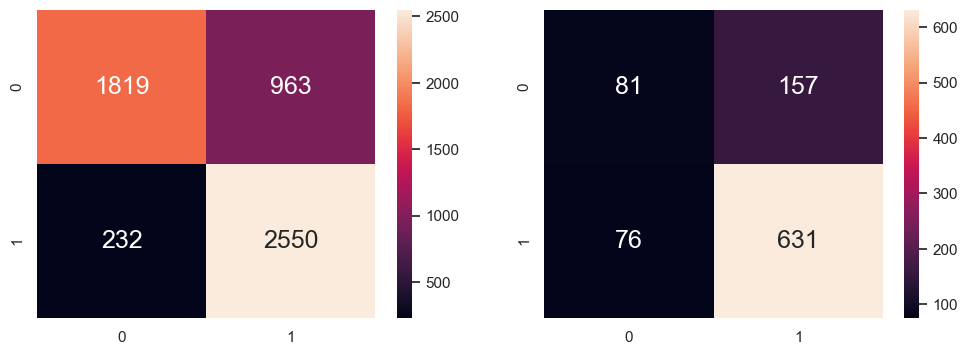

In [66]:
# Create a logistic regression classifier
lr = LogisticRegression(C=1000, penalty='l2', solver='liblinear',random_state=2)

# Fit the model on the training data
lr.fit(X_res, y_res)

y_train_pred = lr.predict(X_res)
y_test_pred = lr.predict(X_test)

classification_metric(y_res, y_train_pred, y_test, y_test_pred)

In [67]:
# define the instance for ridge classifier
ridge_clf = RidgeClassifier()

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(ridge_clf, param_grid, cv=5)

# Train the model on the training data with the best hyperparameters
grid_search.fit(X_res, y_res)

# Print the best hyperparameters and score
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best Hyperparameters: {'alpha': 1}
Best Score: 0.7406736605324905


Goodness of Fit of Model - Train Dataset
Accuracy: 	 0.5627246585190511
Precision: 	 0.5346024191949237
Recall: 	 0.9690869877785766
F1 Score: 	 0.689073482428115

Goodness of Fit of Model - Test Dataset
Accuracy: 	 0.7544973544973544
Precision: 	 0.7733026467203682
Recall: 	 0.9504950495049505
F1 Score: 	 0.8527918781725888

              precision    recall  f1-score   support

     Class 0       0.54      0.17      0.26       238
     Class 1       0.77      0.95      0.85       707

    accuracy                           0.75       945
   macro avg       0.66      0.56      0.56       945
weighted avg       0.71      0.75      0.70       945



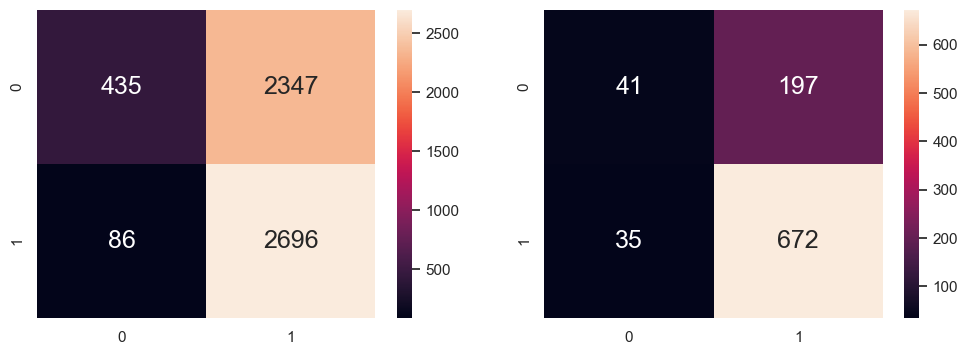

In [68]:
# Create a RidgeClassifier object with alpha=1.0 (default)
ridge_clf = RidgeClassifier(alpha =  1)

# Train the model on the training data
ridge_clf.fit(X_train, y_train)

y_train_pred = ridge_clf.predict(X_res)
y_test_pred = ridge_clf.predict(X_test)

classification_metric(y_res, y_train_pred, y_test, y_test_pred)

In [69]:
# Create a SGDClassifier object
sgd = SGDClassifier()

# Define the hyperparameters and their values for tuning
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'max_iter': [1000, 5000, 10000],
              'tol': [1e-3, 1e-4, 1e-5]}

# Create a GridSearchCV object
grid_search = GridSearchCV(sgd, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_res, y_res)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print('Best Score:', grid_search.best_score_)

Best hyperparameters:  {'alpha': 0.01, 'max_iter': 5000, 'penalty': 'l1', 'tol': 0.001}
Best Score: 0.6191626752506351


Goodness of Fit of Model - Train Dataset
Accuracy: 	 0.26402116402116405
Precision: 	 0.0
Recall: 	 0.0
F1 Score: 	 0.0

Goodness of Fit of Model - Test Dataset
Accuracy: 	 0.2518518518518518
Precision: 	 0.0
Recall: 	 0.0
F1 Score: 	 0.0

              precision    recall  f1-score   support

     Class 0       0.25      1.00      0.40       238
     Class 1       0.00      0.00      0.00       707

    accuracy                           0.25       945
   macro avg       0.13      0.50      0.20       945
weighted avg       0.06      0.25      0.10       945



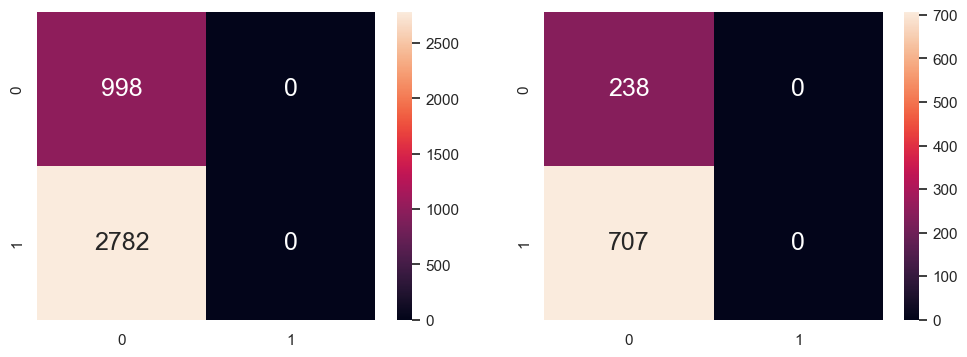

In [70]:
# Create an SGDClassifier object with default hyperparameters
sgd_clf = SGDClassifier(alpha=0.01, max_iter=5000,penalty='l1', tol=0.001)

# Train the model on the training data
sgd_clf.fit(X_res, y_res)

y_train_pred = sgd_clf.predict(X_train)
y_test_pred = sgd_clf.predict(X_test)

classification_metric(y_train, y_train_pred, y_test, y_test_pred)

### Model Evaluation

Based on the models above, we can deduce that **logistic regression** is the best model to predict the success rate of our video games. Accuracy, Precision, Recall and F1 score between the train data and test data does not show a lot of difference meaning that the model is neither underfitted nor overfitted. The accuracy is around 75% whereas precision, recall and F1 score are around 85%.

**RandomForestClassifier** - Although it did well on the train dataset, the model did not do well on the test dataset which means the model is slighly overfitted.

**RidgeClassifier** - The model is slightly underfitted since the test model is better than train model.

**SGDClassifier** - This model is the second best from logistic regression